This notebook illustrates using clustering and our descriptors compounds.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
data = pd.read_csv("../data/processed/descriptors.csv")

In [3]:
data.head(2)

,Compound,logkpl,MLogP,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,nRings3,nRings5,nRings6,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
0,p-Nitrophenol; 4-nitrophenol,-2.250000,1.68,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,3.408284,2.285714,6.0,373.777514,409.011832,503.255946,390.565769,173.603316,10.0,8.519901
1,Benzyl bromide,-1.892027,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,3.111111,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537


In [92]:
# getting all descriptors except compound name
without_compound = data.iloc[:, 1:]
without_compound.head(2)

,logkpl,MLogP,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,nRings3,nRings5,nRings6,WPATH,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
0,-2.250000,1.68,1.0,1.0,1.0,1.0,0.0,0.0,1.0,120.0,...,3.408284,2.285714,6.0,373.777514,409.011832,503.255946,390.565769,173.603316,10.0,8.519901
1,-1.892027,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,3.111111,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537


In [5]:
# scaling our data by using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(without_compound)

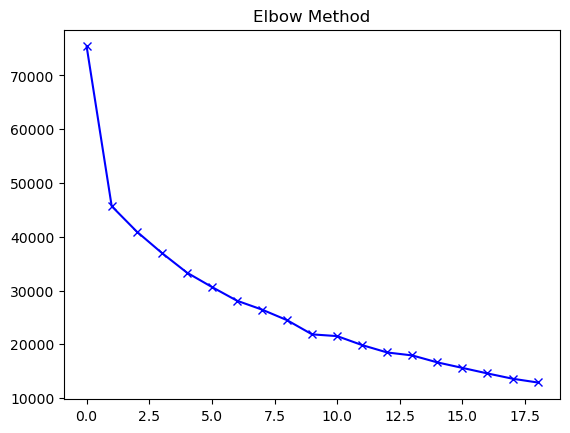

In [57]:
# elbow method
n_clusters = 20
cost = []
for i in range(1, n_clusters):
    kmean= KMeans(i, n_init=10, max_iter=1000)
    kmean.fit(X_scaled)
    cost.append(kmean.inertia_)  

plt.title("Elbow Method")
plt.plot(cost, 'bx-');

In [58]:
kmean = KMeans(4, n_init=10, max_iter=1000)
kmean.fit(X_scaled)
labels = kmean.labels_

In [59]:
# adding clusters to our data
clusters = pd.concat([without_compound, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

,logkpl,MLogP,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,nRings3,nRings5,nRings6,WPATH,...,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP,cluster
0,-2.250000,1.68,1.0,1.0,1.0,1.0,0.0,0.0,1.0,120.0,...,2.285714,6.0,373.777514,409.011832,503.255946,390.565769,173.603316,10.0,8.519901,0
1,-1.892027,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537,0
2,-1.545120,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537,0
3,-2.222060,2.12,1.0,1.0,1.0,1.0,0.0,0.0,1.0,64.0,...,1.800000,6.0,343.647962,360.656857,405.171149,284.539313,96.667566,8.0,8.556987,0
4,-1.824345,2.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298.0,...,7.100592,0.0,588.801978,590.026029,630.062246,602.270174,511.259323,12.0,8.506996,2


In [86]:
# using pca with 2 components to visualize our scaled data with clusters
components = 2

# initilizing and fitting the pca
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_scaled)

# making dataframe for our pca components
pca_df = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])

# adding cluster assignment
pca_df['cluster'] = pd.Categorical(kmean.labels_)

# adding compound name to this dataframe
pca_df['compound'] = data['Compound']

# get the index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(pca.components_[i]).argmax() for i in range(components)]

# columns/ features of our data
initial_feature_names = without_compound.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(components)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i + 1): most_important_names[i] for i in range(components)}

# explained variance
print("Explained variance ratio", pca.explained_variance_ratio_)
print("\nnSum of Explained variance ratio", pca.explained_variance_ratio_.sum())
print("\nColumns chosen by PCA", dic)


pca_df

Explained variance ratio [0.44922987 0.08813972]

nSum of Explained variance ratio 0.5373695934217562

Columns chosen by PCA {'PC1': 'ATSp2', 'PC2': 'C2SP2'}


,PCA1,PCA2,cluster,compound
0,-7.327199,-1.450374,0,p-Nitrophenol; 4-nitrophenol
1,-7.324766,-4.397774,0,Benzyl bromide
2,-7.329245,-4.432410,0,Benzyl bromide
3,-8.007982,-2.118530,0,Benzyl alcohol
4,-4.469871,2.147807,2,2-Ethylhexyl acrylate
...,...,...,...,...
441,-6.390847,-1.667954,0,Methylparaben
442,0.479389,-7.911524,3,1-(diphenylmethyl)-4-methylpiperazine
443,1.217783,-7.776306,3,1-(diphenylmethyl)-4-ethylpiperazine
444,1.764531,-7.670935,3,1-(diphenylmethyl)-4-propylpiperazine


In [64]:
fig = px.scatter(pca_df, x='PCA1', y='PCA2', color="cluster", hover_data=['compound'], title="Compounds Clustering", width=800)
fig.show()

# Interpretation

In [90]:
# getting compound name and cluster
results = pca_df[['compound', 'cluster']]
results.head(2)

,compound,cluster
0,p-Nitrophenol; 4-nitrophenol,0
1,Benzyl bromide,0


In [66]:
# checking if any compound is has been assigned to more than one cluster
for co in results['compound'].unique():
    if results[results['compound'] == co]['cluster'].nunique() > 1:
        print(co)
print("Finished!")

Finished!


In [67]:
# sorting values by cluster to make it easier to look in excel sheet
results.sort_values('cluster', inplace=True)
results

,compound,cluster
0,p-Nitrophenol; 4-nitrophenol,0
115,4-phenylbutanol,0
303,Caffeine,0
427,o-Phenylenediamine,0
426,o-Cresol,0
...,...,...
444,1-(diphenylmethyl)-4-propylpiperazine,3
223,Estradiol,3
224,Estradiol,3
226,Beta-Estradiol,3


In [34]:
# saving the results into excel sheet
results.to_excel('../results/clusters.xlsx', index=False)

In [70]:
# grouping by cluster and getting descriptive values
cluster_analysis = clusters.groupby('cluster', as_index=False).agg({'logkpl': ['count', 'min', 'max', 'mean']})
cluster_analysis.columns = ['cluster', 'logkpl_count', 'logkpl_min', 'logkpl_max', 'logkpl_mean']
cluster_analysis

,cluster,logkpl_count,logkpl_min,logkpl_max,logkpl_mean
0,0,159,-5.376751,-0.080922,-2.338047
1,1,120,-5.527244,-1.220981,-2.906265
2,2,90,-4.958607,-0.986619,-2.642533
3,3,77,-4.696804,-1.107567,-2.759968


In [91]:
cluster_analysis.to_excel("../results/clusters_analysis.xlsx", index=False)